<a href="https://colab.research.google.com/github/kellyslpang/unpackAIworkbooks/blob/main/Spotify_Dataset_Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.2 MB/s 
     |████████████████████████████████| 60 kB 9.1 MB/s 
     |████████████████████████████████| 1.2 MB 41.4 MB/s 
     |████████████████████████████████| 46 kB 6.1 MB/s 
     |████████████████████████████████| 188 kB 52.8 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 441 kB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

# Spotify Dataset

Dataset source : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=dict_artists.json

The data was first cleaned and narrowed down to :
- Year of release between 1990 and 1999 inclusive.
- "Year" column to extract year from "release_date" field


### Look at the Data

In [4]:
path = Path('gdrive/MyDrive/ai/spotifyDS')

In [23]:
df = pd.read_csv(path/'tracks - 1990.csv', low_memory=False)

In [24]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'Year', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [25]:
display(df)

,id,name,popularity,duration_ms,...,liveness,valence,tempo,time_signature
0,002ak2fuoNB5KW0plsN1jp,Sally,26,213533,...,0.0785,0.6960,97.397,4
1,002KIBXwb0pa66mPGuPKMr,When You Don't See Me,33,294249,...,0.3250,0.8710,121.244,4
2,003PmYxl19KBg6m4uxClbR,Als Je Bij Me Bent,22,217267,...,0.2250,0.2800,146.181,4
3,004VesjMxIn4AzXd8c52n1,Babhemu (Friends),5,392507,...,0.0846,0.4180,100.897,3
4,008ndXyCzkkN9fvJsfqkDS,Rumor Has It,37,228973,...,0.1050,0.2680,170.297,4
...,...,...,...,...,...,...,...,...,...
7818,7zLfwTYJJkgYeVDUNzWESo,"The Nutcracker Suite, Op. 71A, Dance of the Sugar Plum Fairy",34,156440,...,0.0944,0.0818,87.998,4
7819,7ztFy4q23m5lr8JZwAmyRu,Camino de Guanajuato,30,163667,...,0.2940,0.4410,94.194,3
7820,7zVeVWX7xZV9YwMo3HfQjx,I Can Do Anything,23,266493,...,0.1700,0.6280,202.106,4
7821,7zw34WlFv3zM7B6CCY9IFd,She's So Bad,13,195133,...,0.1200,0.8500,170.452,4


In [26]:
dep_var = 'popularity'

In [40]:
df.fillna(df.mean())

,id,name,popularity,duration_ms,...,liveness,valence,tempo,time_signature
0,002ak2fuoNB5KW0plsN1jp,Sally,3.258097,213533,...,0.0785,0.6960,97.397,4
1,002KIBXwb0pa66mPGuPKMr,When You Don't See Me,3.496508,294249,...,0.3250,0.8710,121.244,4
2,003PmYxl19KBg6m4uxClbR,Als Je Bij Me Bent,3.091042,217267,...,0.2250,0.2800,146.181,4
3,004VesjMxIn4AzXd8c52n1,Babhemu (Friends),1.609438,392507,...,0.0846,0.4180,100.897,3
4,008ndXyCzkkN9fvJsfqkDS,Rumor Has It,3.610918,228973,...,0.1050,0.2680,170.297,4
...,...,...,...,...,...,...,...,...,...
7818,7zLfwTYJJkgYeVDUNzWESo,"The Nutcracker Suite, Op. 71A, Dance of the Sugar Plum Fairy",3.526361,156440,...,0.0944,0.0818,87.998,4
7819,7ztFy4q23m5lr8JZwAmyRu,Camino de Guanajuato,3.401197,163667,...,0.2940,0.4410,94.194,3
7820,7zVeVWX7xZV9YwMo3HfQjx,I Can Do Anything,3.135494,266493,...,0.1700,0.6280,202.106,4
7821,7zw34WlFv3zM7B6CCY9IFd,She's So Bad,2.564949,195133,...,0.1200,0.8500,170.452,4


In [50]:
df = df.fillna(df.mean())

In [51]:
df[dep_var] = np.log(df[dep_var])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Decision Trees

This is a good first step, but we will need to do a bit more cleaning. For this, we will use fastai objects called `TabularPandas` and `TabularProc`.

### Using TabularPandas and TabularProc

In [52]:
procs = [Categorify, FillMissing]

In [53]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

`TabularPandas` needs to be told which columns are continuous and which are categorical. We can handle that automatically using the helper function `cont_cat_split`:

In [54]:
cont, cat = cont_cat_split(df, 1, dep_var=dep_var)

In [55]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

A `TabularPandas` behaves a lot like a fastai `Datasets` object, including providing `train` and `valid` attributes:

In [56]:
len(to.train),len(to.valid)

(6259, 1564)

We can see that the data is still displayed as strings for categories (we only show a few columns here because the full table is too big to fit on a page):

In [57]:
to.show(30)

,id,name,artists,id_artists,release_date,Year,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
2041,21wyArpxWaSHafFtqGl51Z,Estanere,['Fairuz'],['0dwFxqYkvZLSA6U6XfQcDV'],1/1/1990,1990,201267,0,0.289,0.0759,9,-13.077,1,0.0377,0.98900,0.000003,0.0953,0.2450,137.304993,4,1.203634
7415,7G3M4QP0tf2uI6evsC8Gdk,Ole Alofa Lava Ile Manu E,"[""The Golden Ali'is""]",['5U1Yy7lr88K3yJLiSFNYKU'],1/5/1990,1990,338973,0,0.604,0.7030,2,-12.197,1,0.1310,0.57000,0.000000,0.3190,0.3850,123.839996,4,0.941939
3393,3HXcorf1qphGlENTHT8J0T,Los Chicos Buenos (Bomberos),['Sexual Democracia'],['3m2dBZiLPZUffYga9ocES7'],27/2/1990,1990,321227,0,0.568,0.5630,5,-11.783,1,0.0331,0.15100,0.000000,0.1150,0.7430,134.389008,4,1.298436
5602,5mYd0UGqAgLUZ60tsqDhsX,So ein Tag so wundersch??n wie heute,['Ernst Neger'],['1XLKHhjJULI2uhgtBCWOHk'],2/1/1990,1990,147440,0,0.561,0.2930,8,-11.963,1,0.0322,0.61400,0.000000,0.0301,0.6660,93.625000,4,1.156269
4150,4b2GAM5mE3K0btATdsi0UO,Dawn Patrol,['Megadeth'],['1Yox196W7bzVNZI7RBaPnf'],1/1/1990,1990,110533,0,0.686,0.3810,4,-15.916,1,0.0403,0.19900,0.559000,0.2770,0.7410,74.773003,4,1.260266
249,0cLvKgKkqlaJ9UajbitH4l,Fire Your Guns,['AC/DC'],['711MCceyCBcFnzjGY4Q7Un'],24/9/1990,1990,173747,0,0.551,0.9600,9,-3.284,1,0.0508,0.00135,0.000007,0.0941,0.5150,98.878998,4,1.405493
1921,1XD0rIjTNo15Ny7OifAoYo,War es ein Traum,['Zillertaler Sch??rzenj??ger'],['1Co7VCKyS0KXwn3SiKXykR'],27/11/1990,1990,259387,0,0.257,0.4680,0,-10.664,1,0.0297,0.22100,0.000057,0.5680,0.2600,85.382004,4,1.041412
1305,1EQO4OsaYQBkyA2xoXzLP6,Prokalis,['Mihalis Rakintzis'],['4dGJFqyX47UE1CuSo5FzwE'],5/2/1990,1990,198840,0,0.707,0.5070,11,-11.504,0,0.0336,0.21600,0.000000,0.0510,0.6450,84.955002,4,1.169032
4031,44N17gCnR923GMNLlq7KHb,070 - Wer hat Tims Mutter entf??hrt? - Teil 04,['TKKG Retro-Archiv'],['0i38tQX5j4gZ0KS3eCMoIl'],1/2/1990,1990,108853,0,0.707,0.5380,7,-9.648,1,0.5390,0.28200,0.000000,0.3290,0.7280,120.064003,5,1.192660
4460,4jsYbP9NkDFqrjdniMxC9x,Mi??rt nem pr??b??lod meg velem?,"['Klari Katona', 'Locomotiv GT']","['50IEME2WVDG1UWDLQ2upRs', '7LyNzazhGasc5A4Pt2d8rU']",1/8/1990,1990,194773,0,0.162,0.1160,9,-13.311,1,0.0351,0.91400,0.787000,0.0968,0.0356,88.417000,4,0.665730


In [58]:
to1 = TabularPandas(df, procs, ['name', 'key', 'time_signature'], [], y_names=dep_var, splits=splits)
to1.show(3)

,name,key,time_signature,popularity
2041,Estanere,9,4,1.203634
7415,Ole Alofa Lava Ile Manu E,2,4,0.941939
3393,Los Chicos Buenos (Bomberos),5,4,1.298436


However, the underlying items are all numeric:

In [59]:
to.items.head(3)

,id,name,popularity,duration_ms,...,liveness,valence,tempo,time_signature
2041,2042,2453,1.203634,201267,...,0.0953,0.245,137.304993,4
7415,7296,4693,0.941939,338973,...,0.3190,0.385,123.839996,4
3393,3255,3949,1.298436,321227,...,0.1150,0.743,134.389008,4


In [60]:
to1.items[['name', 'key', 'time_signature']].head(3)

,name,key,time_signature
2041,2453,10,4
7415,4693,3,4
3393,3949,6,4


In [61]:
save_pickle(path/'toSpot.pkl',to)

Now that all this preprocessing is done, we are ready to create a decision tree.

### Creating the Decision Tree

To begin, we define our independent and dependent variables:

In [ ]:
to = load_pickle(path/'toSpot.pkl')

In [62]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

Now that our data is all numeric, and there are no missing values, we can create a decision tree:

In [63]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

ValueError: ignored

To keep it simple, we've told sklearn to just create four *leaf nodes*. To see what it's learned, we can display the tree:

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

Understanding this picture is one of the best ways to understand decision trees, so we will start at the top and explain each part step by step.

The top node represents the *initial model* before any splits have been done, when all the data is in one group. This is the simplest possible model. It is the result of asking zero questions and will always predict the value to be the average value of the whole dataset. In this case, we can see it predicts a value of 10.10 for the logarithm of the sales price. It gives a mean squared error of 0.48. The square root of this is 0.69. (Remember that unless you see `m_rmse`, or a *root mean squared error*, then the value you are looking at is before taking the square root, so it is just the average of the square of the differences.) We can also see that there are 404,710 auction records in this group—that is the total size of our training set. The final piece of information shown here is the decision criterion for the best split that was found, which is to split based on the `coupler_system` column.

Moving down and to the left, this node shows us that there were 360,847 auction records for equipment where `coupler_system` was less than 0.5. The average value of our dependent variable in this group is 10.21. Moving down and to the right from the initial model takes us to the records where `coupler_system` was greater than 0.5.

The bottom row contains our *leaf nodes*: the nodes with no answers coming out of them, because there are no more questions to be answered. At the far right of this row is the node containing records where `coupler_system` was greater than 0.5. The average value here is 9.21, so we can see the decision tree algorithm did find a single binary decision that separated high-value from low-value auction results. Asking only about `coupler_system` predicts an average value of 9.21 versus 10.1.

Returning back to the top node after the first decision point, we can see that a second binary decision split has been made, based on asking whether `YearMade` is less than or equal to 1991.5. For the group where this is true (remember, this is now following two binary decisions, based on `coupler_system` and `YearMade`) the average value is 9.97, and there are 155,724 auction records in this group. For the group of auctions where this decision is false, the average value is 10.4, and there are 205,123 records. So again, we can see that the decision tree algorithm has successfully split our more expensive auction records into two more groups which differ in value significantly.

We can show the same information using Terence Parr's powerful [dtreeviz](https://explained.ai/decision-tree-viz/) library:

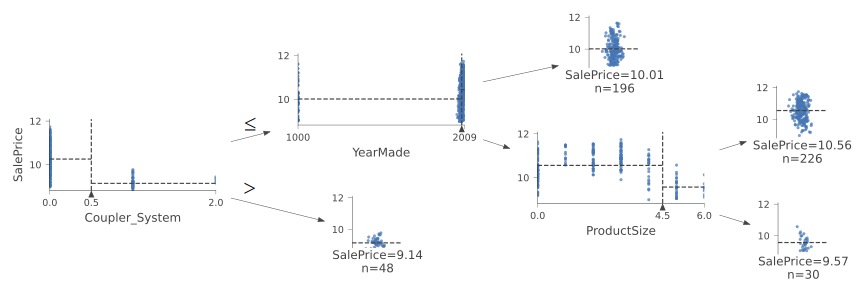

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

This shows a chart of the distribution of the data for each split point. We can clearly see that there's a problem with our `YearMade` data: there are bulldozers made in the year 1000, apparently! Presumably this is actually just a missing value code (a value that doesn't otherwise appear in the data and that is used as a placeholder in cases where a value is missing). For modeling purposes, 1000 is fine, but as you can see this outlier makes visualization of the values we are interested in more difficult. So, let's replace it with 1950:

In [ ]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

That change makes the split much clearer in the tree visualization, even although it doesn't actually change the result of the model in any significant way. This is a great example of how resilient decision trees are to data issues!

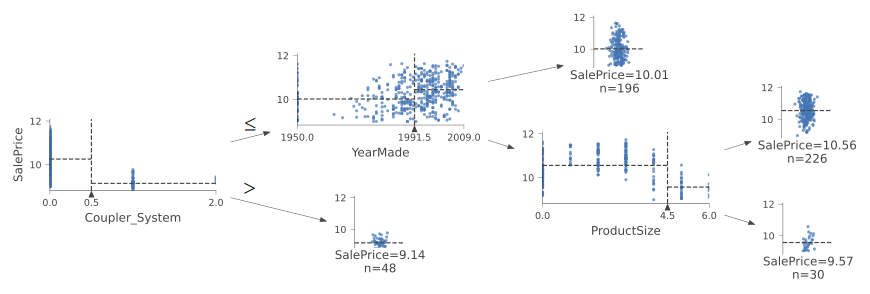

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

Let's now have the decision tree algorithm build a bigger tree. Here, we are not passing in any stopping criteria such as `max_leaf_nodes`:

In [ ]:
m = DecisionTreeRegressor()
m.fit(xs, y);

We'll create a little function to check the root mean squared error of our model (`m_rmse`), since that's how the competition was judged:

In [ ]:
def r_mse(pred,y): 
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y): 
    return r_mse(m.predict(xs), y)

In [ ]:
m_rmse(m, xs, y)

1e-06

So, our model is perfect, right? Not so fast... remember we really need to check the validation set, to ensure we're not overfitting:

In [ ]:
m_rmse(m, valid_xs, valid_y)

0.329691

Oops—it looks like we might be overfitting pretty badly. Here's why:

In [ ]:
m.get_n_leaves(), len(xs)

(324538, 404710)

We've got nearly as many leaf nodes as data points! That seems a little over-enthusiastic. Indeed, sklearn's default settings allow it to continue splitting nodes until there is only one item in each leaf node. Let's change the stopping rule to tell sklearn to ensure every leaf node contains at least 25 auction records:

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.248593, 0.323301)

That looks much better. Let's check the number of leaves again:

In [ ]:
m.get_n_leaves()

12397

Much more reasonable!

> A: Here's my intuition for an overfitting decision tree with more leaf nodes than data items. Consider the game Twenty Questions. In that game, the chooser secretly imagines an object (like, "our television set"), and the guesser gets to pose 20 yes or no questions to try to guess what the object is (like "Is it bigger than a breadbox?"). The guesser is not trying to predict a numerical value, but just to identify a particular object out of the set of all imaginable objects. When your decision tree has more leaves than there are possible objects in your domain, then it is essentially a well-trained guesser. It has learned the sequence of questions needed to identify a particular data item in the training set, and it is "predicting" only by describing that item's value. This is a way of memorizing the training set—i.e., of overfitting.

Building a decision tree is a good way to create a model of our data. It is very flexible, since it can clearly handle nonlinear relationships and interactions between variables. But we can see there is a fundamental compromise between how well it generalizes (which we can achieve by creating small trees) and how accurate it is on the training set (which we can achieve by using large trees).

So how do we get the best of both worlds? We'll show you right after we handle an important missing detail: how to handle categorical variables.

### Categorical Variables

In the previous chapter, when working with deep learning networks, we dealt with categorical variables by one-hot encoding them and feeding them to an embedding layer. The embedding layer helped the model to discover the meaning of the different levels of these variables (the levels of a categorical variable do not have an intrinsic meaning, unless we manually specify an ordering using Pandas). In a decision tree, we don't have embeddings layers—so how can these untreated categorical variables do anything useful in a decision tree? For instance, how could something like a product code be used?

The short answer is: it just works! Think about a situation where there is one product code that is far more expensive at auction than any other one. In that case, any binary split will result in that one product code being in some group, and that group will be more expensive than the other group. Therefore, our simple decision tree building algorithm will choose that split. Later during training the algorithm will be able to further split the subgroup that contains the expensive product code, and over time, the tree will home in on that one expensive product.

It is also possible to use one-hot encoding to replace a single categorical variable with multiple one-hot-encoded columns, where each column represents a possible level of the variable. Pandas has a `get_dummies` method which does just that.

However, there is not really any evidence that such an approach improves the end result. So, we generally avoid it where possible, because it does end up making your dataset harder to work with. In 2019 this issue was explored in the paper ["Splitting on Categorical Predictors in Random Forests"](https://peerj.com/articles/6339/) by Marvin Wright and Inke König, which said:

> : The standard approach for nominal predictors is to consider all $2^{k-1} − 1$ 2-partitions of the *k* predictor categories. However, this exponential relationship produces a large number of potential splits to be evaluated, increasing computational complexity and restricting the possible number of categories in most implementations. For binary classification and regression, it was shown that ordering the predictor categories in each split leads to exactly the same splits as the standard approach. This reduces computational complexity because only *k* − 1 splits have to be considered for a nominal predictor with *k* categories.

Now that you understand how decisions tree work, it's time for the best-of-both-worlds solution: random forests.

## Random Forests

In 1994 Berkeley professor Leo Breiman, one year after his retirement, published a small technical report called ["Bagging Predictors"](https://www.stat.berkeley.edu/~breiman/bagging.pdf), which turned out to be one of the most influential ideas in modern machine learning. The report began:

> : Bagging predictors is a method for generating multiple versions of a predictor and using these to get an aggregated predictor. The aggregation averages over the versions... The multiple versions are formed by making bootstrap replicates of the learning set and using these as new learning sets. Tests… show that bagging can give substantial gains in accuracy. The vital element is the instability of the prediction method. If perturbing the learning set can cause significant changes in the predictor constructed, then bagging can improve accuracy.

Here is the procedure that Breiman is proposing:

1. Randomly choose a subset of the rows of your data (i.e., "bootstrap replicates of your learning set").
1. Train a model using this subset.
1. Save that model, and then return to step 1 a few times.
1. This will give you a number of trained models. To make a prediction, predict using all of the models, and then take the average of each of those model's predictions.

This procedure is known as "bagging." It is based on a deep and important insight: although each of the models trained on a subset of data will make more errors than a model trained on the full dataset, those errors will not be correlated with each other. Different models will make different errors. The average of those errors, therefore, is: zero! So if we take the average of all of the models' predictions, then we should end up with a prediction that gets closer and closer to the correct answer, the more models we have. This is an extraordinary result—it means that we can improve the accuracy of nearly any kind of machine learning algorithm by training it multiple times, each time on a different random subset of the data, and averaging its predictions.

In 2001 Leo Breiman went on to demonstrate that this approach to building models, when applied to decision tree building algorithms, was particularly powerful. He went even further than just randomly choosing rows for each model's training, but also randomly selected from a subset of columns when choosing each split in each decision tree. He called this method the *random forest*. Today it is, perhaps, the most widely used and practically important machine learning method.

In essence a random forest is a model that averages the predictions of a large number of decision trees, which are generated by randomly varying various parameters that specify what data is used to train the tree and other tree parameters. Bagging is a particular approach to "ensembling," or combining the results of multiple models together. To see how it works in practice, let's get started on creating our own random forest!

In [47]:
# pip install —pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn —U

### Creating a Random Forest

We can create a random forest just like we created a decision tree, except now, we are also specifying parameters that indicate how many trees should be in the forest, how we should subset the data items (the rows), and how we should subset the fields (the columns).

In the following function definition `n_estimators` defines the number of trees we want, `max_samples` defines how many rows to sample for training each tree, and `max_features` defines how many columns to sample at each split point (where `0.5` means "take half the total number of columns"). We can also specify when to stop splitting the tree nodes, effectively limiting the depth of the tree, by including the same `min_samples_leaf` parameter we used in the last section. Finally, we pass `n_jobs=-1` to tell sklearn to use all our CPUs to build the trees in parallel. By creating a little function for this, we can more quickly try different variations in the rest of this chapter:

In [48]:
def rf(xs, y, n_estimators=40, max_samples=200_000, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                                 max_samples=max_samples, max_features=max_features,
                                 min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [49]:
m = rf(xs, y);

ValueError: ignored

Our validation RMSE is now much improved over our last result produced by the `DecisionTreeRegressor`, which made just one tree using all the available data:

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.171367, 0.234267)

One of the most important properties of random forests is that they aren't very sensitive to the hyperparameter choices, such as `max_features`. You can set `n_estimators` to as high a number as you have time to train—the more trees you have, the more accurate the model will be. `max_samples` can often be left at its default, unless you have over 200,000 data points, in which case setting it to 200,000 will make it train faster with little impact on accuracy. `max_features=0.5` and `min_samples_leaf=4` both tend to work well, although sklearn's defaults work well too.

The sklearn docs [show an example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of the effects of different `max_features` choices, with increasing numbers of trees. In the plot, the blue plot line uses the fewest features and the green line uses the most (it uses all the features). As you can see in `Max Feature Chart`, the models with the lowest error result from using a subset of features but with a larger number of trees.

**`Max Feature Chart`**

<img alt="sklearn max_features chart" width="500" caption="Error based on max features and number of trees (source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)" src="https://github.com/fastai/fastbook/blob/master/images/sklearn_features.png?raw=1" id="max_features"/>

To see the impact of `n_estimators`, let's get the predictions from each individual tree in our forest (these are in the `estimators_` attribute):

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

As you can see, `preds.mean(0)` gives the same results as our random forest:

In [ ]:
r_mse(preds.mean(0), valid_y)

0.234267

Let's see what happens to the RMSE as we add more and more trees. As you can see, the improvement levels off quite a bit after around 30 trees:

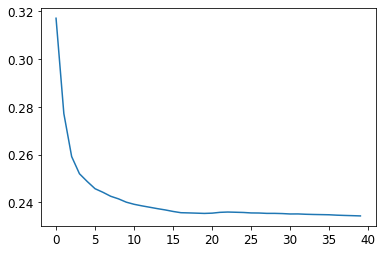

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

The performance on our validation set is worse than on our training set. But is that because we're overfitting, or because the validation set covers a different time period, or a bit of both? With the existing information we've seen, we can't tell. However, random forests have a very clever trick called *out-of-bag* (OOB) error that can help us with this (and more!).

### Out-of-Bag Error

Recall that in a random forest, each tree is trained on a different subset of the training data. The OOB error is a way of measuring prediction error on the training set by only including in the calculation of a row's error trees where that row was *not* included in training. This allows us to see whether the model is overfitting, without needing a separate validation set.

> A: My intuition for this is that, since every tree was trained with a different randomly selected subset of rows, out-of-bag error is a little like imagining that every tree therefore also has its own validation set. That validation set is simply the rows that were not selected for that tree's training.

This is particularly beneficial in cases where we have only a small amount of training data, as it allows us to see whether our model generalizes without removing items to create a validation set. The OOB predictions are available in the `oob_prediction_` attribute. Note that we compare them to the training labels, since this is being calculated on trees using the training set.

In [ ]:
r_mse(m.oob_prediction_, y)

0.211352

We can see that our OOB error is much lower than our validation set error. This means that something else is causing that error, in *addition* to normal generalization error. We'll discuss the reasons for this later in this chapter.

This is one way to interpret our model's predictions—let's focus on more of those now.

## Model Interpretation

For tabular data, model interpretation is particularly important. For a given model, the things we are most likely to be interested in are:

- How confident are we in our predictions using a particular row of data?
- For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?
- Which columns are the strongest predictors, which can we ignore?
- Which columns are effectively redundant with each other, for purposes of prediction?
- How do predictions vary, as we vary these columns?

As we will see, random forests are particularly well suited to answering these questions. Let's start with the first one!

### Tree Variance for Prediction Confidence

We saw how the model averages the individual tree's predictions to get an overall prediction—that is, an estimate of the value. But how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions across the trees, instead of just the mean. This tells us the *relative* confidence of predictions. In general, we would want to be more cautious of using the results for rows where trees give very different results (higher standard deviations), compared to cases where they are more consistent (lower standard deviations).

In the earlier section on creating a random forest, we saw how to get predictions over the validation set, using a Python list comprehension to do this for each tree in the forest:

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
preds.shape

(40, 7988)

Now we have a prediction for every tree and every auction (40 trees and 7,988 auctions) in the validation set.

Using this we can get the standard deviation of the predictions over all the trees, for each auction:

In [ ]:
preds_std = preds.std(0)

Here are the standard deviations for the predictions for the first five auctions—that is, the first five rows of the validation set:

In [ ]:
preds_std[:5]

array([0.25126221, 0.11382379, 0.11026719, 0.26118843, 0.11921586])

As you can see, the confidence in the predictions varies widely. For some auctions, there is a low standard deviation because the trees agree. For others it's higher, as the trees don't agree. This is information that would be useful in a production setting; for instance, if you were using this model to decide what items to bid on at auction, a low-confidence prediction might cause you to look more carefully at an item before you made a bid.

### Feature Importance

It's not normally enough just to know that a model can make accurate predictions—we also want to know *how* it's making predictions. *feature importance* gives us insight into this. We can get these directly from sklearn's random forest by looking in the `feature_importances_` attribute. Here's a simple function we can use to pop them into a DataFrame and sort them:

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

The feature importances for our model show that the first few most important columns have much higher importance scores than the rest, with (not surprisingly) `YearMade` and `ProductSize` being at the top of the list:

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
57,YearMade,0.177727
6,ProductSize,0.130049
30,Coupler_System,0.102222
7,fiProductClassDesc,0.078206
54,ModelID,0.055812
65,saleElapsed,0.050265
3,fiSecondaryDesc,0.043976
32,Hydraulics_Flow,0.042874
31,Grouser_Tracks,0.040630
1,fiModelDesc,0.030053


A plot of the feature importances shows the relative importances more clearly:

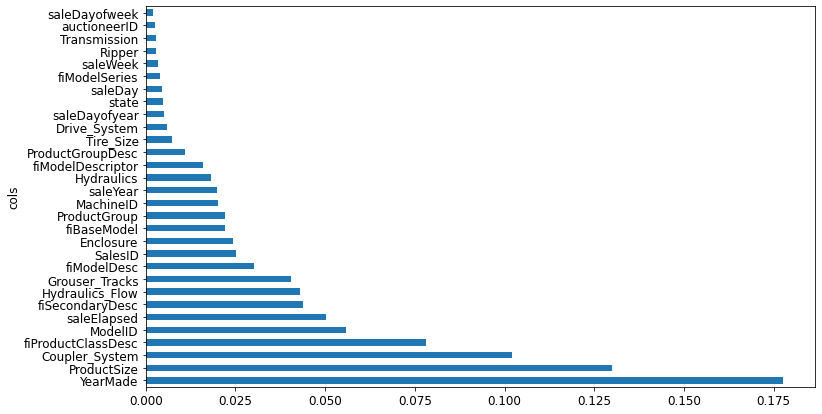

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

The way these importances are calculated is quite simple yet elegant. The feature importance algorithm loops through each tree, and then recursively explores each branch. At each branch, it looks to see what feature was used for that split, and how much the model improves as a result of that split. The improvement (weighted by the number of rows in that group) is added to the importance score for that feature. This is summed across all branches of all trees, and finally the scores are normalized such that they add to 1.

### Removing Low-Importance Variables

It seems likely that we could use just a subset of the columns by removing the variables of low importance and still get good results. Let's try just keeping those with a feature importance greater than 0.005:

In [ ]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

21

We can retrain our model using just this subset of the columns:

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

And here's the result:

In [ ]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.181236, 0.230973)

Our accuracy is about the same, but we have far fewer columns to study:

In [ ]:
len(xs.columns), len(xs_imp.columns)

(66, 21)

We've found that generally the first step to improving a model is simplifying it—78 columns was too many for us to study them all in depth! Furthermore, in practice often a simpler, more interpretable model is easier to roll out and maintain.

This also makes our feature importance plot easier to interpret. Let's look at it again:

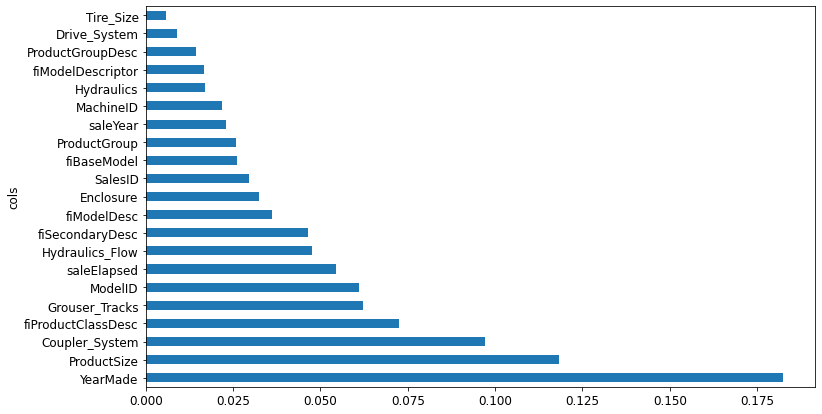

In [ ]:
plot_fi(rf_feat_importance(m, xs_imp));

One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings: for example, `ProductGroup` and `ProductGroupDesc`. Let's try to remove any redundent features. 

### Removing Redundant Features

Let's start with:

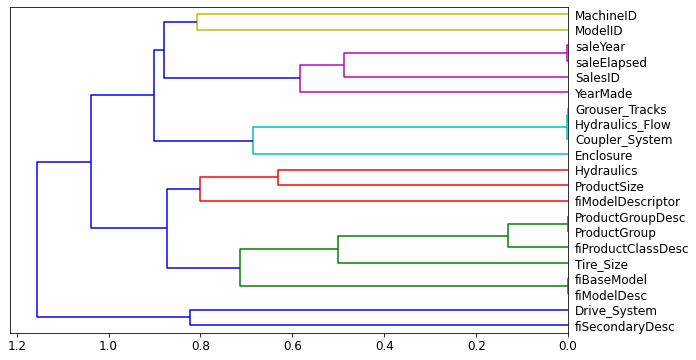

In [ ]:
cluster_columns(xs_imp)

In this chart, the pairs of columns that are most similar are the ones that were merged together early, far from the "root" of the tree at the left. Unsurprisingly, the fields `ProductGroup` and `ProductGroupDesc` were merged quite early, as were `saleYear` and `saleElapsed` and `fiModelDesc` and `fiBaseModel`. These might be so closely correlated they are practically synonyms for each other.

> note: Determining Similarity: The most similar pairs are found by calculating the _rank correlation_, which means that all the values are replaced with their _rank_ (i.e., first, second, third, etc. within the column), and then the _correlation_ is calculated. (Feel free to skip over this minor detail though, since it's not going to come up again in the book!)

Let's try removing some of these closely related features to see if the model can be simplified without impacting the accuracy. First, we create a function that quickly trains a random forest and returns the OOB score, by using a lower `max_samples` and higher `min_samples_leaf`. The OOB score is a number returned by sklearn that ranges between 1.0 for a perfect model and 0.0 for a random model. (In statistics it's called *R^2*, although the details aren't important for this explanation.) We don't need it to be very accurate—we're just going to use it to compare different models, based on removing some of the possibly redundant columns:

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
                              max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

Here's our baseline:

In [ ]:
get_oob(xs_imp)

0.8775689798048504

Now we try removing each of our potentially redundant variables, one at a time:

In [ ]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'Coupler_System': 0.8770788965408086,
 'Grouser_Tracks': 0.877914842071475,
 'Hydraulics_Flow': 0.8774788455114167,
 'ProductGroup': 0.8775426660740155,
 'ProductGroupDesc': 0.877685212917638,
 'fiBaseModel': 0.8765577643464737,
 'fiModelDesc': 0.8760691137445065,
 'saleElapsed': 0.8726988805822192,
 'saleYear': 0.8768163145777621}

Now let's try dropping multiple variables. We'll drop one from each of the tightly aligned pairs we noticed earlier. Let's see what that does:

In [ ]:
to_drop = ['saleYear', 'ProductGroupDesc', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8743229869121798

Looking good! This is really not much worse than the model with all the fields. Let's create DataFrames without these columns, and save them:

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

We can load them back later with:

In [ ]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

Now we can check our RMSE again, to confirm that the accuracy hasn't substantially changed.

In [ ]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.183203, 0.23315)

By focusing on the most important variables, and removing some redundant ones, we've greatly simplified our model. Now, let's see how those variables affect our predictions using partial dependence plots.

### Partial Dependence

As we've seen, the two most important predictors are `ProductSize` and `YearMade`. We'd like to understand the relationship between these predictors and sale price. It's a good idea to first check the count of values per category (provided by the Pandas `value_counts` method), to see how common each category is:

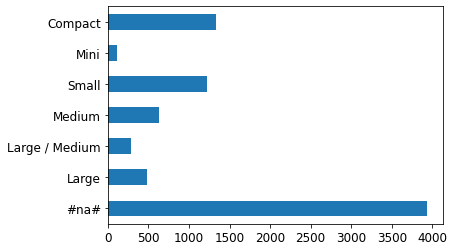

In [ ]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

The largrest group is `#na#`, which is the label fastai applies to missing values.

Let's do the same thing for `YearMade`. Since this is a numeric feature, we'll need to draw a histogram, which groups the year values into a few discrete bins:

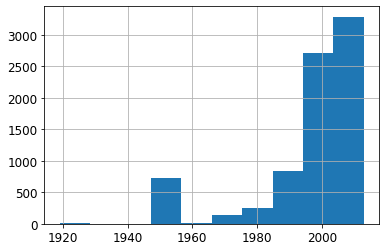

In [ ]:
ax = valid_xs_final['YearMade'].hist()

Other than the special value 1950 which we used for coding missing year values, most of the data is from after 1990.

Now we're ready to look at *partial dependence plots*. Partial dependence plots try to answer the question: if a row varied on nothing other than the feature in question, how would it impact the dependent variable?

For instance, how does `YearMade` impact sale price, all other things being equal?

To answer this question, we can't just take the average sale price for each `YearMade`. The problem with that approach is that many other things vary from year to year as well, such as which products are sold, how many products have air-conditioning, inflation, and so forth. So, merely averaging over all the auctions that have the same `YearMade` would also capture the effect of how every other field also changed along with `YearMade` and how that overall change affected price.

Instead, what we do is replace every single value in the `YearMade` column with 1950, and then calculate the predicted sale price for every auction, and take the average over all auctions. Then we do the same for 1951, 1952, and so forth until our final year of 2011. This isolates the effect of only `YearMade` (even if it does so by averaging over some imagined records where we assign a `YearMade` value that might never actually exist alongside some other values). 

> A: If you are philosophically minded it is somewhat dizzying to contemplate the different kinds of hypotheticality that we are juggling to make this calculation. First, there's the fact that _every_ prediction is hypothetical, because we are not noting empirical data. Second, there's the point that we're _not_ merely interested in asking how sale price would change if we changed `YearMade` and everything else along with it. Rather, we're very specifically asking, how sale price would change in a hypothetical world where only `YearMade` changed. Phew! It is impressive that we can ask such questions. I recommend Judea Pearl and Dana Mackenzie's recent book on causality, _The Book of Why_ (Basic Books), if you're interested in more deeply exploring formalisms for analyzing these subtleties.

With these averages, we can then plot each of these years on the x-axis, and each of the predictions on the y-axis. This, finally, is a partial dependence plot. Let's take a look:

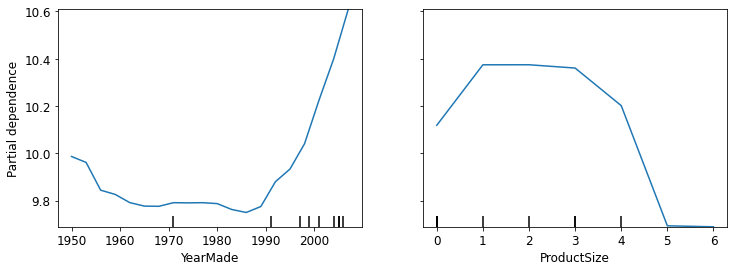

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['YearMade','ProductSize'],
                        grid_resolution=20, ax=ax);

Looking first of all at the `YearMade` plot, and specifically at the section covering the years after 1990 (since as we noted this is where we have the most data), we can see a nearly linear relationship between year and price. Remember that our dependent variable is after taking the logarithm, so this means that in practice there is an exponential increase in price. This is what we would expect: depreciation is generally recognized as being a multiplicative factor over time, so, for a given sale date, varying year made ought to show an exponential relationship with sale price.

The `ProductSize` partial plot is a bit concerning. It shows that the final group, which we saw is for missing values, has the lowest price. To use this insight in practice, we would want to find out *why* it's missing so often, and what that *means*. Missing values can sometimes be useful predictors—it entirely depends on what causes them to be missing. Sometimes, however, they can indicate *data leakage*.

### Data Leakage

In  the paper ["Leakage in Data Mining: Formulation, Detection, and Avoidance"](https://dl.acm.org/doi/10.1145/2020408.2020496), Shachar Kaufman, Saharon Rosset, and Claudia Perlich describe leakage as: 

> : The introduction of information about the target of a data mining problem, which should not be legitimately available to mine from. A trivial example of leakage would be a model that uses the target itself as an input, thus concluding for example that 'it rains on rainy days'. In practice, the introduction of this illegitimate information is unintentional, and facilitated by the data collection, aggregation and preparation process.

They give as an example:

> : A real-life business intelligence project at IBM where potential customers for certain products were identified, among other things, based on keywords found on their websites. This turned out to be leakage since the website content used for training had been sampled at the point in time where the potential customer has already become a customer, and where the website contained traces of the IBM products purchased, such as the word 'Websphere' (e.g., in a press release about the purchase or a specific product feature the client uses).

Data leakage is subtle and can take many forms. In particular, missing values often represent data leakage.

For instance, Jeremy competed in a Kaggle competition designed to predict which researchers would end up receiving research grants. The information was provided by a university and included thousands of examples of research projects, along with information about the researchers involved and data on whether or not each grant was eventually accepted. The university hoped to be able to use the models developed in this competition to rank which grant applications were most likely to succeed, so it could prioritize its processing.

Jeremy used a random forest to model the data, and then used feature importance to find out which features were most predictive. He noticed three surprising things:

- The model was able to correctly predict who would receive grants over 95% of the time.
- Apparently meaningless identifier columns were the most important predictors.
- The day of week and day of year columns were also highly predictive; for instance, the vast majority of grant applications dated on a Sunday were accepted, and many accepted grant applications were dated on January 1.

For the identifier columns, one partial dependence plot per column showed that when the information was missing the application was almost always rejected. It turned out that in practice, the university only filled out much of this information *after* a grant application was accepted. Often, for applications that were not accepted, it was just left blank. Therefore, this information was not something that was actually available at the time that the application was received, and it would not be available for a predictive model—it was data leakage.

In the same way, the final processing of successful applications was often done automatically as a batch at the end of the week, or the end of the year. It was this final processing date which ended up in the data, so again, this information, while predictive, was not actually available at the time that the application was received.

This example showcases the most practical and simple approaches to identifying data leakage, which are to build a model and then:

- Check whether the accuracy of the model is *too good to be true*.
- Look for important predictors that don't make sense in practice.
- Look for partial dependence plot results that don't make sense in practice.

Thinking back to our bear detector, this mirrors the advice that we provided in <<chapter_production>>—it is often a good idea to build a model first and then do your data cleaning, rather than vice versa. The model can help you identify potentially problematic data issues.

It can also help you identify which factors influence specific predictions, with tree interpreters.

### Tree Interpreter

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

At the start of this section, we said that we wanted to be able to answer five questions:

- How confident are we in our predictions using a particular row of data?
- For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?
- Which columns are the strongest predictors?
- Which columns are effectively redundant with each other, for purposes of prediction?
- How do predictions vary, as we vary these columns?

We've handled four of these already; only the second question remains. To answer this question, we need to use the `treeinterpreter` library. We'll also use the `waterfallcharts` library to draw the chart of the results.

    !pip install treeinterpreter
    !pip install waterfallcharts

We have already seen how to compute feature importances across the entire random forest. The basic idea was to look at the contribution of each variable to improving the model, at each branch of every tree, and then add up all of these contributions per variable.

We can do exactly the same thing, but for just a single row of data. For instance, let's say we are looking at some particular item at auction. Our model might predict that this item will be very expensive, and we want to know why. So, we take that one row of data and put it through the first decision tree, looking to see what split is used at each point throughout the tree. For each split, we see what the increase or decrease in the addition is, compared to the parent node of the tree. We do this for every tree, and add up the total change in importance by split variable.

For instance, let's pick the first few rows of our validation set:

In [ ]:
row = valid_xs_final.iloc[:5]

We can then pass these to `treeinterpreter`:

In [ ]:
prediction, bias, contributions = treeinterpreter.predict(m, row.values)

`prediction` is simply the prediction that the random forest makes. `bias` is the prediction based on taking the mean of the dependent variable (i.e., the *model* that is the root of every tree). `contributions` is the most interesting bit—it tells us the total change in predicition due to each of the independent variables. Therefore, the sum of `contributions` plus `bias` must equal the `prediction`, for each row. Let's look just at the first row:

In [ ]:
prediction[0], bias[0], contributions[0].sum()

(array([9.97146129]), 10.104613268267393, -0.13315198123822694)

The clearest way to display the contributions is with a *waterfall plot*. This shows how the positive and negative contributions from all the independent variables sum up to create the final prediction, which is the righthand column labeled "net" here:

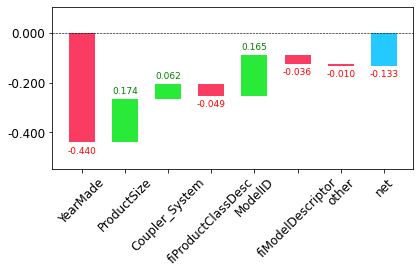

In [ ]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

This kind of information is most useful in production, rather than during model development. You can use it to provide useful information to users of your data product about the underlying reasoning behind the predictions.

Now that we covered some classic machine learning techniques to solve this problem, let's see how deep learning can help!

## Extrapolation and Neural Networks

A problem with random forests, like all machine learning or deep learning algorithms, is that they don't always generalize well to new data. We will see in which situations neural networks generalize better, but first, let's look at the extrapolation problem that random forests have.

### The Extrapolation Problem

In [ ]:
np.random.seed(42)

Let's consider the simple task of making predictions from 40 data points showing a slightly noisy linear relationship:

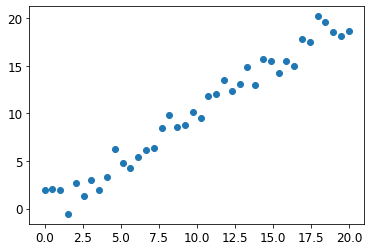

In [ ]:
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

Although we only have a single independent variable, sklearn expects a matrix of independent variables, not a single vector. So we have to turn our vector into a matrix with one column. In other words, we have to change the *shape* from `[40]` to `[40,1]`. One way to do that is with the `unsqueeze` method, which adds a new unit axis to a tensor at the requested dimension:

In [ ]:
xs_lin = x_lin.unsqueeze(1)
x_lin.shape, xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

A more flexible approach is to slice an array or tensor with the special value `None`, which introduces an additional unit axis at that location:

In [ ]:
x_lin[:, None].shape

torch.Size([40, 1])

We can now create a random forest for this data. We'll use only the first 30 rows to train the model:

In [ ]:
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

Then we'll test the model on the full dataset. The blue dots are the training data, and the red dots are the predictions:

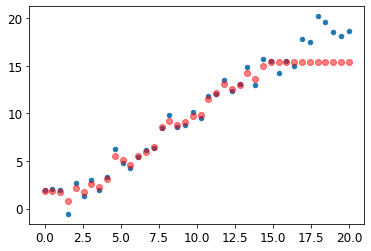

In [ ]:
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

We have a big problem! Our predictions outside of the domain that our training data covered are all too low. Why do you suppose this is?

Remember, a random forest just averages the predictions of a number of trees. And a tree simply predicts the average value of the rows in a leaf. Therefore, a tree and a random forest can never predict values outside of the range of the training data. This is particularly problematic for data where there is a trend over time, such as inflation, and you wish to make predictions for a future time. Your predictions will be systematically too low.

But the problem extends beyond time variables. Random forests are not able to extrapolate outside of the types of data they have seen, in a more general sense. That's why we need to make sure our validation set does not contain out-of-domain data.

### Finding Out-of-Domain Data

Sometimes it is hard to know whether your test set is distributed in the same way as your training data, or, if it is different, what columns reflect that difference. There's actually an easy way to figure this out, which is to use a random forest!

But in this case we don't use the random forest to predict our actual dependent variable. Instead, we try to predict whether a row is in the validation set or the training set. To see this in action, let's combine our training and validation sets together, create a dependent variable that represents which dataset each row comes from, build a random forest using that data, and get its feature importance:

In [ ]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
5,saleElapsed,0.854892
9,SalesID,0.121883
12,MachineID,0.015335
0,YearMade,0.002917
4,ModelID,0.000813
8,fiModelDesc,0.000719


This shows that there are three columns that differ significantly between the training and validation sets: `saleElapsed`, `SalesID`, and `MachineID`. It's fairly obvious why this is the case for `saleElapsed`: it's the number of days between the start of the dataset and each row, so it directly encodes the date. The difference in `SalesID` suggests that identifiers for auction sales might increment over time. `MachineID` suggests something similar might be happening for individual items sold in those auctions.

Let's get a baseline of the original random forest model's RMSE, then see what the effect is of removing each of these columns in turn:

In [ ]:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.233189
SalesID 0.23048
saleElapsed 0.236804
MachineID 0.231623


It looks like we should be able to remove `SalesID` and `MachineID` without losing any accuracy. Let's check:

In [ ]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.229664

Removing these variables has slightly improved the model's accuracy; but more importantly, it should make it more resilient over time, and easier to maintain and understand. We recommend that for all datasets you try building a model where your dependent variable is `is_valid`, like we did here. It can often uncover subtle *domain shift* issues that you may otherwise miss.

One thing that might help in our case is to simply avoid using old data. Often, old data shows relationships that just aren't valid any more. Let's try just using the most recent few years of the data:

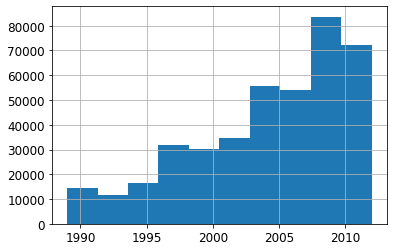

In [ ]:
xs['saleYear'].hist();

Here's the result of training on this subset:

In [ ]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [ ]:
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.177743, 0.229302)

It's a tiny bit better, which shows that you shouldn't always just use your entire dataset; sometimes a subset can be better.

Let's see if using a neural network helps.

### Using a Neural Network

We can use the same approach to build a neural network model. Let's first replicate the steps we took to set up the `TabularPandas` object:

In [ ]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes, ordered=True, inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

We can leverage the work we did to trim unwanted columns in the random forest by using the same set of columns for our neural network:

In [ ]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

Categorical columns are handled very differently in neural networks, compared to decision tree approaches. As we saw in `Chapter 8 Collab`, in a neural net a great way to handle categorical variables is by using embeddings. To create embeddings, fastai needs to determine which columns should be treated as categorical variables. It does this by comparing the number of distinct levels in the variable to the value of the `max_card` parameter. If it's lower, fastai will treat the variable as categorical. Embedding sizes larger than 10,000 should generally only be used after you've tested whether there are better ways to group the variable, so we'll use 9,000 as our `max_card`:

In [ ]:
cont_nn, cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In this case, there's one variable that we absolutely do not want to treat as categorical: the `saleElapsed` variable. A categorical variable cannot, by definition, extrapolate outside the range of values that it has seen, but we want to be able to predict auction sale prices in the future. Let's verify that `cont_cat_split` did the correct thing.

In [ ]:
cont_nn

['saleElapsed']

Let's take a look at the cardinality of each of the categorical variables that we have chosen so far:

In [ ]:
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
Hydraulics_Flow          3
fiModelDesc           5059
Enclosure                6
ProductGroup             6
Hydraulics              12
fiModelDescriptor      140
Tire_Size               17
Drive_System             4
dtype: int64

The fact that there are two variables pertaining to the "model" of the equipment, both with similar very high cardinalities, suggests that they may contain similar, redundant information. Note that we would not necessarily see this when analyzing redundant features, since that relies on similar variables being sorted in the same order (that is, they need to have similarly named levels). Having a column with 5,000 levels means needing 5,000 columns in our embedding matrix, which would be nice to avoid if possible. Let's see what the impact of removing one of these model columns has on the random forest:

In [ ]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.177017, 0.231142)

There's minimal impact, so we will remove it as a predictor for our neural network:

In [ ]:
cat_nn.remove('fiModelDescriptor')

We can create our `TabularPandas` object in the same way as when we created our random forest, with one very important addition: normalization. A random forest does not need any normalization—the tree building procedure cares only about the order of values in a variable, not at all about how they are scaled. But as we have seen, a neural network definitely does care about this. Therefore, we add the `Normalize` processor when we build our `TabularPandas` object:

In [ ]:
procs_nn = [Categorify, FillMissing, Normalize]

to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

Tabular models and data don't generally require much GPU RAM, so we can use larger batch sizes:

In [ ]:
dls = to_nn.dataloaders(1024)

As we've discussed, it's a good idea to set `y_range` for regression models, so let's find the min and max of our dependent variable:

In [ ]:
y = to_nn.train.y
y.min(), y.max()

(8.465899467468262, 11.863582611083984)

We can now create the `Learner` to create this tabular model. As usual, we use the application-specific learner function, to take advantage of its application-customized defaults. We set the loss function to MSE, since that's what this competition uses.

By default, for tabular data fastai creates a neural network with two hidden layers, with 200 and 100 activations, respectively. This works quite well for small datasets, but here we've got quite a large dataset, so we increase the layer sizes to 500 and 250:

In [ ]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.0002290867705596611)

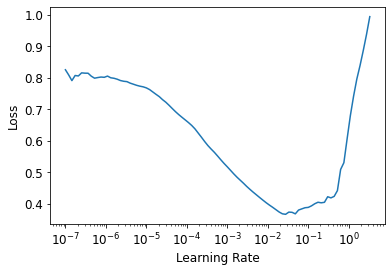

In [ ]:
learn.lr_find()

There's no need to use `fine_tune`, so we'll train with `fit_one_cycle` for a few epochs and see how it looks:

In [ ]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,0.063607,0.063943,00:08
1,0.054125,0.060992,00:08
2,0.049782,0.052950,00:08
3,0.042938,0.050409,00:08
4,0.040523,0.050933,00:08


We can use our `r_mse` function to compare the result to the random forest result we got earlier:

In [ ]:
preds, targs = learn.get_preds()
r_mse(preds,targs)

0.225684

It's quite a bit better than the random forest (although it took longer to train, and it's fussier about hyperparameter tuning).

Before we move on, let's save our model in case we want to come back to it again later:

In [ ]:
learn.save('nn')

Path('models/nn.pth')

### Sidebar: fastai's Tabular Classes

In fastai, a tabular model is simply a model that takes columns of continuous or categorical data, and predicts a category (a classification model) or a continuous value (a regression model). Categorical independent variables are passed through an embedding, and concatenated, as we saw in the neural net we used for collaborative filtering, and then continuous variables are concatenated as well.

The model created in `tabular_learner` is an object of class `TabularModel`. Take a look at the source for `tabular_learner` now (remember, that's `tabular_learner??` in Jupyter). You'll see that like `collab_learner`, it first calls `get_emb_sz` to calculate appropriate embedding sizes (you can override these by using the `emb_szs` parameter, which is a dictionary containing any column names you want to set sizes for manually), and it sets a few other defaults. Other than that, it just creates the `TabularModel`, and passes that to `TabularLearner` (note that `TabularLearner` is identical to `Learner`, except for a customized `predict` method).

That means that really all the work is happening in `TabularModel`, so take a look at the source for that now. With the exception of the `BatchNorm1d` and `Dropout` layers (which we'll be learning about shortly), you now have the knowledge required to understand this whole class. Take a look at the discussion of `EmbeddingNN` at the end of the last chapter. Recall that it passed `n_cont=0` to `TabularModel`. We now can see why that was: because there are zero continuous variables (in fastai the `n_` prefix means "number of," and `cont` is an abbreviation for "continuous").

### End sidebar

Another thing that can help with generalization is to use several models and average their predictions—a technique, as mentioned earlier, known as *ensembling*.

## Ensembling

Think back to the original reasoning behind why random forests work so well: each tree has errors, but those errors are not correlated with each other, so the average of those errors should tend towards zero once there are enough trees. Similar reasoning could be used to consider averaging the predictions of models trained using different algorithms.

In our case, we have two very different models, trained using very different algorithms: a random forest, and a neural network. It would be reasonable to expect that the kinds of errors that each one makes would be quite different. Therefore, we might expect that the average of their predictions would be better than either one's individual predictions.

As we saw earlier, a random forest is itself an ensemble. But we can then include a random forest in *another* ensemble—an ensemble of the random forest and the neural network! While ensembling won't make the difference between a successful and an unsuccessful modeling process, it can certainly add a nice little boost to any models that you have built.

One minor issue we have to be aware of is that our PyTorch model and our sklearn model create data of different types: PyTorch gives us a rank-2 tensor (i.e, a column matrix), whereas NumPy gives us a rank-1 array (a vector). `squeeze` removes any unit axes from a tensor, and `to_np` converts it into a NumPy array:

In [ ]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

This gives us a better result than either model achieved on its own:

In [ ]:
r_mse(ens_preds,valid_y)

0.222167

In fact, this result is better than any score shown on the Kaggle leaderboard. It's not directly comparable, however, because the Kaggle leaderboard uses a separate dataset that we do not have access to. Kaggle does not allow us to submit to this old competition to find out how we would have done, but our results certainly look very encouraging!

### Boosting

So far our approach to ensembling has been to use *bagging*, which involves combining many models (each trained on a different data subset) together by averaging them. As we saw, when this is applied to decision trees, this is called a *random forest*.

There is another important approach to ensembling, called *boosting*, where we add models instead of averaging them. Here is how boosting works:

- Train a small model that underfits your dataset.
- Calculate the predictions in the training set for this model.
- Subtract the predictions from the targets; these are called the "residuals" and represent the error for each point in the training set.
- Go back to step 1, but instead of using the original targets, use the residuals as the targets for the training.
- Continue doing this until you reach some stopping criterion, such as a maximum number of trees, or you observe your validation set error getting worse.

Using this approach, each new tree will be attempting to fit the error of all of the previous trees combined. Because we are continually creating new residuals, by subtracting the predictions of each new tree from the residuals from the previous tree, the residuals will get smaller and smaller.

To make predictions with an ensemble of boosted trees, we calculate the predictions from each tree, and then add them all together. There are many models following this basic approach, and many names for the same models. *Gradient boosting machines* (GBMs) and *gradient boosted decision trees* (GBDTs) are the terms you're most likely to come across, or you may see the names of specific libraries implementing these; at the time of writing, *XGBoost* is the most popular.

Note that, unlike with random forests, with this approach there is nothing to stop us from overfitting. Using more trees in a random forest does not lead to overfitting, because each tree is independent of the others. But in a boosted ensemble, the more trees you have, the better the training error becomes, and eventually you will see overfitting on the validation set.

We are not going to go into detail on how to train a gradient boosted tree ensemble here, because the field is moving rapidly, and any guidance we give will almost certainly be outdated by the time you read this. As we write this, sklearn has just added a `HistGradientBoostingRegressor` class that provides excellent performance. There are many hyperparameters to tweak for this class, and for all gradient boosted tree methods we have seen. Unlike random forests, gradient boosted trees are extremely sensitive to the choices of these hyperparameters; in practice, most people use a loop that tries a range of different hyperparameters to find the ones that work best.

One more technique that has gotten great results is to use embeddings learned by a neural net in a machine learning model.

### Combining Embeddings with Other Methods

The abstract of the entity embedding paper we mentioned at the start of this chapter states: "the embeddings obtained from the trained neural network boost the performance of all tested machine learning methods considerably when used as the input features instead". It includes the very interesting table in `Embedding Mixed`.

**`Embedding Mixed`**

<img alt="Embeddings combined with other methods" width="500" id="embedding_mixed" caption="Effects of using neural network embeddings as input to other machine learning methods (courtesy of Cheng Guo and Felix Berkhahn)" src="https://github.com/fastai/fastbook/blob/master/images/att_00054.png?raw=1">

This is showing the mean average percent error (MAPE) compared among four different modeling techniques, three of which we have already seen, along with *k*-nearest neighbors (KNN), which is a very simple baseline method. The first numeric column contains the results of using the methods on the data provided in the competition; the second column shows what happens if you first train a neural network with categorical embeddings, and then use those categorical embeddings instead of the raw categorical columns in the model. As you see, in every case, the models are dramatically improved by using the embeddings instead of the raw categories.

This is a really important result, because it shows that you can get much of the performance improvement of a neural network without actually having to use a neural network at inference time. You could just use an embedding, which is literally just an array lookup, along with a small decision tree ensemble.

These embeddings need not even be necessarily learned separately for each model or task in an organization. Instead, once a set of embeddings are learned for some column for some task, they could be stored in a central place, and reused across multiple models. In fact, we know from private communication with other practitioners at large companies that this is already happening in many places.

## Conclusion: Our Advice for Tabular Modeling

We have dicussed two approaches to tabular modeling: decision tree ensembles and neural networks. We've also mentioned two different decision tree ensembles: random forests, and gradient boosting machines. Each is very effective, but each also has compromises:

- *Random forests* are the easiest to train, because they are extremely resilient to hyperparameter choices and require very little preprocessing. They are very fast to train, and should not overfit if you have enough trees. But they can be a little less accurate, especially if extrapolation is required, such as predicting future time periods.

- *Gradient boosting machines* in theory are just as fast to train as random forests, but in practice you will have to try lots of different hyperparameters. They can overfit, but they are often a little more accurate than random forests.

- *Neural networks* take the longest time to train, and require extra preprocessing, such as normalization; this normalization needs to be used at inference time as well. They can provide great results and extrapolate well, but only if you are careful with your hyperparameters and take care to avoid overfitting.

We suggest starting your analysis with a random forest. This will give you a strong baseline, and you can be confident that it's a reasonable starting point. You can then use that model for feature selection and partial dependence analysis, to get a better understanding of your data.

From that foundation, you can try neural nets and GBMs, and if they give you significantly better results on your validation set in a reasonable amount of time, you can use them. If decision tree ensembles are working well for you, try adding the embeddings for the categorical variables to the data, and see if that helps your decision trees learn better.

# unpackAI Assignments Section

Current assignments are marked with `>>`:


| Week | Topic                             | Chapters                  |Assignment                                                             | Comments / Links |
|:----:|:----------------------------------|:--------------------------|:----------------------------------------------------------------------|:----------------|
| 1    | Warm-up Session                   |                           | No assignment                                                         | -
| 2    | Recap/Refresh SGD                 | Chapter 4, MNIST Basic    | Make a model using SGD for the full MNIST dataset. Built from scratch |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/resources/04_mnist_full_set_sgd_with_gpu.ipynb 
|      |                                   | Chapter 5, Pet Breeds     | Read sections on Cross-Entropy Loss to use in your model. You may skip the rest|
| 3    | More on CV                        | Chapter 5, Pet Breeds     | Read notebook, run it and perform assignments at the bottom           |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/05_pet_breeds.ipynb
|      | (Learn the theory)                | Chapter 6, Multi-Category | Read notebook, run it and perform assignments at the bottom           |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/06_multicat.ipynb
|      |                                   | Chapter 7, Sizing and TTA | Read notebook, run it and perform assignments at the bottom           |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/07_sizing_and_tta.ipynb
|4     | Bring together all CV             | All CV chapters           | Final challenge with MNIST                                            |https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/resources/dl201_pract_1.ipynb
|      | (Practical Exercises)             | All CV chapters           | Take the model you trained in Ch 2, and use any methods learned to improve it.  | - 
|5     | Tabular/Colaborative Filtering    | >> Chapter 8, Collab         | Read notebook and run it  | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/08_collab.ipynb
|      | (Learn the theory)                | >> Chapter 8, Collab         | Write your own code in a new notebooks and run your models. | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/own_code_templates/08_collab_own_code.ipynb
|      |                                   | >> Chapter 8, Collab         | Run additional code and reflect at questions in bold | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/08_collab.ipynb
|      |                                   | >> Chapter 9, Tabular        | Read notebook and run it    | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/09_tabular.ipynb
|      |                                   | >> Chapter 9, Tabular        | Write your own code in a new notebooks and run your models.  | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/own_code_templates/09_tabular_own_code.ipynb
|      |                                   | >> Chapter 9, Tabular        | Run additional code and reflect at questions in bold | https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/09_tabular.ipynb


## Assignment 1: Write your own code

Write your own code in a new notebook by refactoring the code in this notebook to make it more compact and understandable for your future self. At the minimum:
- Load *Blue Book for Bulldozer* dataset and create the DataLoaders
- Create a Random Forest model and run it to a respectable error rate
- Create a deep learning TabularModel and run it to a respectable error rate
- Extract the embedding weight from your tabular model

You can use this [template](https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/own_code_templates/09_tabular_own_code.ipynb) to guide you.

[link text](https://)## Assignment 2: Run additional code

### Random Forest

In this code, we will run some experiments to define how many estimators we should use for our Random Forest model.

Make sure you have run the notebook at least to the section **Creating the Decision Tree**.

Now we reload the *Tabular Object* `to` that we have create above.

In [ ]:
to = load_pickle(path/'to.pkl')

In [ ]:
# doc(to)

First we create our RF model

In [ ]:
# Error Function / Metric
def r_mse(pred,y): 
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y): 
    return r_mse(m.predict(xs), y)

In [ ]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [ ]:
# Set hyper parameters
n_estimators=40
max_samples=200_000
max_features=0.5
min_samples_leaf=5

# Create random forest model
m = RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                          max_samples=max_samples, max_features=max_features,
                          min_samples_leaf=min_samples_leaf, oob_score=True)

Then we fit the model

In [ ]:
# Fit model and evaluate RMSE for training and validation sets
m.fit(xs, y)
train_error, valid_error = m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)
train_error, valid_error

(0.171061, 0.232668)

A random forest model consisit of `n_estimators` independant decision trees (estimators), each considered "poor" estimators, but whose average is a good one.

We can peek into the performance of each of the 40 single estimators and compare with the overall error rate

In [ ]:
rmse_train_single_tree = tensor([m_rmse(t, xs, y) for t in m.estimators_])
rmse_valid_single_tree = tensor([m_rmse(t, valid_xs, valid_y) for t in m.estimators_])

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
fig.suptitle('RMSE for each estimators in RF')

axs[0].plot(range(n_estimators), rmse_train_single_tree, label='Training set')
axs[0].axhline(y=train_error, label='RF Training Error', ls=':')
axs[0].set_xlabel("Estimator's Nbr")
axs[0].set_ylabel("RMSE Value")
axs[0].set_title('Training Set')
axs[0].legend()

axs[1].plot(range(n_estimators), rmse_valid_single_tree, label='Validation set')
axs[1].axhline(y=valid_error, label='RF Validation Error', ls=':')
axs[1].set_xlabel("Estimator's Nbr")
axs[1].set_ylabel("RMSE Value")
axs[1].set_title('Validation Set')
axs[1].legend()

plt.show()

It is clear that the error rate for the Random Forest model is much better than the error rate for each of the decision trees (estimators)

**How many estimators should we use?**

To answer this question, we can just make trials using an increasing number of estimators, but only using a small amount of data (e.g. 20,000 samples) to get an idea of when increating the number of estimators no longer give much improvement in error rate.

In [ ]:
# Set hyper parameters
max_samples=20_000
max_features=0.5
min_samples_leaf=5

n_estimators = []
validation_error = []

for n in range(5, 100, 5):
    # Create random forest model
    m = RandomForestRegressor(n_jobs=-1, n_estimators=n,
                            max_samples=max_samples, max_features=max_features,
                            min_samples_leaf=min_samples_leaf, oob_score=False)
    m.fit(xs, y)
    e = m_rmse(m, valid_xs, valid_y)
    n_estimators.append(n)
    validation_error.append(e)

fig, ax = plt.subplots()
ax.plot(n_estimators, validation_error)
ax.set_xlabel('nbr estimators')
plt.show()

Now, let's check with the normal parameters (200,000) 20 and 40.

In [ ]:
# Set hyper parameters
n_estimators=20
max_samples=200_000
max_features=0.5
min_samples_leaf=5

# Create random forest model
m = RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                          max_samples=max_samples, max_features=max_features,
                          min_samples_leaf=min_samples_leaf, oob_score=True)

m.fit(xs, y)
m_rmse(m, valid_xs, valid_y)

0.236496

In [ ]:
# Set hyper parameters
n_estimators=40
max_samples=200_000
max_features=0.5
min_samples_leaf=5

# Create random forest model
m = RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                          max_samples=max_samples, max_features=max_features,
                          min_samples_leaf=min_samples_leaf, oob_score=True)

m.fit(xs, y)
m_rmse(m, valid_xs, valid_y)

0.232997

## Assignment 3: Reflect on questionnaire

1. What is a continuous variable?
1. What is a categorical variable?
1. Provide two of the words that are used for the possible values of a categorical variable.
1. What is a "dense layer"?
1. **How do entity embeddings reduce memory usage and speed up neural networks?**
1. **What kinds of datasets are entity embeddings especially useful for?**
1. What are the two main families of machine learning algorithms?
1. **Why do some categorical columns need a special ordering in their classes? How do you do this in Pandas?**
1. **Summarize what a decision tree algorithm does.**
1. **Why is a date different from a regular categorical or continuous variable, and how can you preprocess it to allow it to be used in a model?**
1. Should you pick a random validation set in the bulldozer competition? If no, what kind of validation set should you pick?
1. What is pickle and what is it useful for?
1. How are `mse`, `samples`, and `values` calculated in the decision tree drawn in this chapter?
1. How do we deal with outliers, before building a decision tree?
1. How do we handle categorical variables in a decision tree?
1. **What is bagging?**
1. What is the difference between `max_samples` and `max_features` when creating a random forest?
1. **If you increase `n_estimators` to a very high value, can that lead to overfitting? Why or why not?**
1. In the section "Creating a Random Forest", just after `max_features`, why did `preds.mean(0)` give the same result as our random forest?
1. **What is "out-of-bag-error"?**
1. Make a list of reasons why a model's validation set error might be worse than the OOB error. How could you test your hypotheses?
1. Explain why random forests are well suited to answering each of the following question:
   - How confident are we in our predictions using a particular row of data?
   - For predicting with a particular row of data, what were the most important factors, and how did they influence that prediction?
   - Which columns are the strongest predictors?
   - How do predictions vary as we vary these columns?
1. **What's the purpose of removing unimportant variables?**
1. What's a good type of plot for showing tree interpreter results?
1. **What is the "extrapolation problem"?**
1. How can you tell if your test or validation set is distributed in a different way than your training set?
1. Why do we ensure `saleElapsed` is a continuous variable, even although it has less than 9,000 distinct values?
1. What is "boosting"?
1. **How could we use embeddings with a random forest? Would we expect this to help?**
1. Why might we not always use a neural net for tabular modeling?

### Further Research

1. Pick a competition on Kaggle with tabular data (current or past) and try to adapt the techniques seen in this chapter to get the best possible results. Compare your results to the private leaderboard.
1. Implement the decision tree algorithm in this chapter from scratch yourself, and try it on the dataset you used in the first exercise.
1. Use the embeddings from the neural net in this chapter in a random forest, and see if you can improve on the random forest results we saw.
1. Explain what each line of the source of `TabularModel` does (with the exception of the `BatchNorm1d` and `Dropout` layers).